In [2]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
columns = ['index', 'ID', 'date', 'query', 'user', 'Text']
tweet = pd.read_csv("c:\\Users\\santi\\Downloads\\ProjectTweets.csv",header=None,names=columns,delimiter=',')
tweet.head(2)


,index,ID,date,query,user,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...


In [3]:
#check query values
if len(tweet['query'].unique()) <2:
    print("query only has 1 value, dropping query field")
    tweet = tweet[[ 'ID', 'date', 'user','Text']]
    print(tweet.columns)

query only has 1 value, dropping query field
Index(['ID', 'date', 'user', 'Text'], dtype='object')


In [4]:
#duplicates
tweet = tweet.drop_duplicates()
tweet.head(2)

,ID,date,user,Text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...


In [5]:
#format date
tweet = tweet[['date','Text']]

date_format = "%a %b %d %H:%M:%S PDT %Y"
# Convert to datetime 
tweet['date'] = pd.to_datetime(tweet['date'], format=date_format)
print(tweet['date'])

0         2009-04-06 22:19:45
1         2009-04-06 22:19:49
2         2009-04-06 22:19:53
3         2009-04-06 22:19:57
4         2009-04-06 22:19:57
                  ...        
1599995   2009-06-16 08:40:49
1599996   2009-06-16 08:40:49
1599997   2009-06-16 08:40:49
1599998   2009-06-16 08:40:49
1599999   2009-06-16 08:40:50
Name: date, Length: 1598315, dtype: datetime64[ns]


In [6]:
#checking hashtags
import re

def hashtags(tweet):
    hashtags = re.findall(r'#\w+', tweet)
    return hashtags

# Apply the function to the 'tweet' column and flatten the list of hashtags
hashtags_list = tweet['Text'].apply(hashtags).explode()
hashtags_list = hashtags_list.value_counts()
print(f'total hashtag: {len(hashtags_list)}')
hashtags_list[:20] #top 20 hashtags

total hashtag: 13653


#followfriday       2112
#fb                 1744
#squarespace         887
#FF                  586
#1                   519
#seb                 499
#FollowFriday        463
#musicmonday         404
#ff                  399
#iranelection        359
#2                   341
#fail                301
#BSB                 299
#myweakness          269
#iremember           268
#asot400             264
#marsiscoming        248
#mcflyforgermany     230
#andyhurleyday       188
#iPhone              185
Name: Text, dtype: int64

In [7]:
tweet['Text']

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: Text, Length: 1598315, dtype: object

In [8]:
def tag(tweet):
    hashtags = re.findall(r'@\w+', tweet)
    return hashtags

# Apply the function to the 'tweet' column and flatten the list of hashtags
tag_list = tweet['Text'].apply(tag).explode()
tag_list = tag_list.value_counts()
print(f'total tag: {len(tag_list)}')
top1000_tag = tag_list[:1000] #top 10 hashtags

total tag: 356113


In [9]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')  # Download the necessary data for NLTK
nltk.download('stopwords')
stemmer = PorterStemmer()
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


def cleaning(text):
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    #remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    ##stop words #stemming
    tokens = nltk.word_tokenize(text)
    stemmed_text = ' '.join([stemmer.stem(token) for token in tokens if token not in stop_words ])
    
    return stemmed_text

tweet['Text'] = tweet['Text'].apply(cleaning)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### TextBlob vs Vader

In [10]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def polarity_Vader(x):
    return sia.polarity_scores(x)["compound"]



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
tweet['score_V'] = tweet['Text'].apply(lambda x: polarity_Vader(x))

In [12]:
#text blob
from textblob import TextBlob

def Polarity_Blob(x):
    return TextBlob(x).sentiment.polarity

tweet['score_T'] = tweet['Text'].apply(lambda x: Polarity_Blob(x))

In [13]:
tweet[['score_V','score_T']].describe()

,score_V,score_T
count,1.598315e+06,1.598315e+06
mean,1.182315e-01,8.188268e-02
std,4.007151e-01,3.073964e-01
min,-9.985000e-01,-1.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,4.404000e-01,2.250000e-01
max,9.928000e-01,1.000000e+00


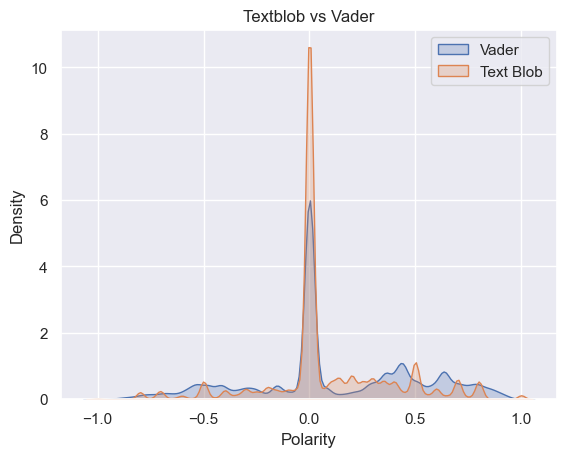

In [14]:
#plot Blob vs vader
sns.set(style="darkgrid")
sns.kdeplot(data=tweet['score_V'], label="Vader", shade=True)
sns.kdeplot(data=tweet['score_T'], label="Text Blob", shade=True)
plt.xlabel("Polarity")
plt.title("Textblob vs Vader")
plt.legend()
plt.show()

Text blob seems to pick up way more tweets as neutral than Vader

In [15]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598315 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   date     1598315 non-null  datetime64[ns]
 1   Text     1598315 non-null  object        
 2   score_V  1598315 non-null  float64       
 3   score_T  1598315 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 61.0+ MB


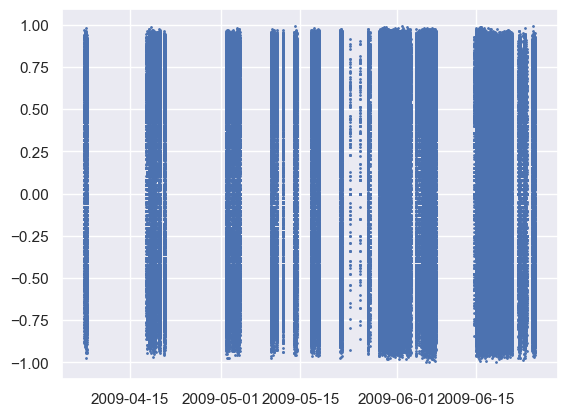

In [16]:
#checking null values in time serie
plt.scatter(tweet['date'], tweet['score_V'], marker='o',s=1)

In [17]:
tweet_2 = tweet.set_index('date')
tweet_2

,Text,score_V,score_T
date,,,
2009-04-06 22:19:45,httptwitpiccom2y1zl awww that bummer you shoul...,-0.3818,0.200
2009-04-06 22:19:49,upset cant updat facebook text might cri resul...,-0.4588,0.000
2009-04-06 22:19:53,i dive mani time ball manag save 50 the rest g...,0.4939,0.000
2009-04-06 22:19:57,whole bodi feel itchi like fire,0.0258,0.200
2009-04-06 22:19:57,behav im mad i cant see,-0.4939,-0.625
...,...,...,...
2009-06-16 08:40:49,just woke have school best feel ever,0.6369,1.000
2009-06-16 08:40:49,thewdbcom veri cool hear old walt interview â ...,0.3182,0.225
2009-06-16 08:40:49,are readi mojo makeov ask detail,0.0000,0.000


In [18]:
tweet_2 = tweet_2.groupby(pd.Grouper(freq='H')).mean()

Text(0.5, 1.0, 'Hourly average')

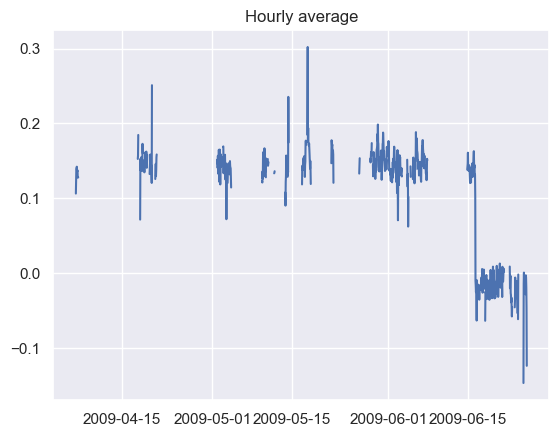

In [19]:
plt.plot(tweet_2.index,tweet_2['score_V'])
plt.title('Hourly average')

Text(0.5, 1.0, 'Daily average')

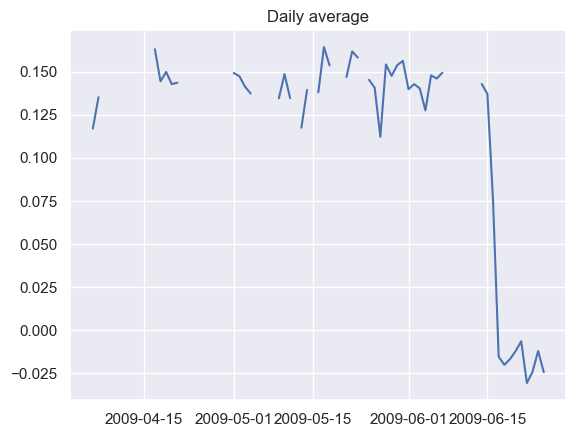

In [20]:
tweet_3 = tweet.set_index('date').groupby(pd.Grouper(freq='D')).mean()
plt.plot(tweet_3.index,tweet_3['score_V'])
plt.title("Daily average")

Text(0.5, 1.0, 'Minute average')

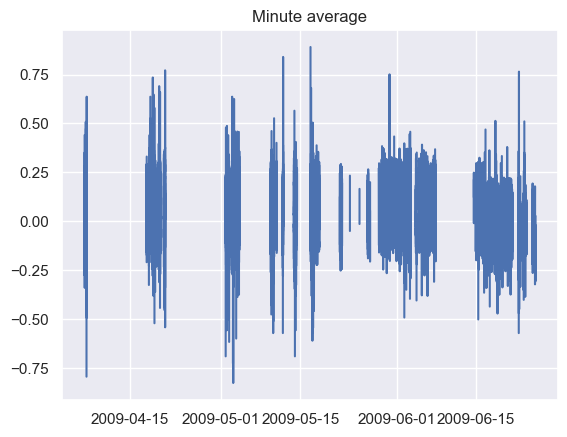

In [21]:
tweet_4 = tweet.set_index('date').groupby(pd.Grouper(freq='T')).mean()
plt.plot(tweet_4.index,tweet_4['score_V'])
plt.title("Minute average")

In [22]:
tweet_5 = tweet.set_index('date').groupby(pd.Grouper(freq='S')).mean()
#can't plot exceed limit

In [23]:
print(f' aggregate by Day percentage of null: {round(tweet_3.score_V.isna().sum()/len(tweet_3),2)}')
print(f' aggregate by Hour percentage of null: {round(tweet_2.score_V.isna().sum()/len(tweet_2),2)}')
print(f' aggregate by Minute percentage of null: {round(tweet_4.score_V.isna().sum()/len(tweet_4),2)}')
print(f' aggregate by Second percentage of null: {round(tweet_5.score_V.isna().sum()/len(tweet_5),2)}')


 aggregate by Day percentage of null: 0.41
 aggregate by Hour percentage of null: 0.69
 aggregate by Minute percentage of null: 0.75
 aggregate by Second percentage of null: 0.89


aggregate by day is probably the way to go if we want to insert missing values as if we go from day to hour we get amost double of the amount of missing data as %

#### Checking speficic tags/mentions

In [24]:
filtered_tweets = pd.DataFrame(columns=['date','Text'])

for tag in top1000_tag.index:
    songs = tweet[tweet['Text'].str.contains(tag)]
    filtered_tweets = filtered_tweets.append(songs)


In [25]:
filtered_tweets.shape

(0, 4)

In [26]:
filtered_tweets['Mentions'] = filtered_tweets['Text'].str.extract(r'@(\w+)')
filtered_tweets['Text'] = filtered_tweets['Text'].str.replace(r'@\w+', '')
filtered_tweets

,date,Text,score_V,score_T,Mentions


In [27]:
filtered_tweets

,date,Text,score_V,score_T,Mentions


In [28]:
#comparing 2 mentions by average score
filtered_tweets[(filtered_tweets['Mentions'] == "mileycyrus") | (filtered_tweets['Mentions'] == "taylorswift13")].groupby('Mentions')['score_V'].mean()

Series([], Name: score_V, dtype: float64)

Dropping the idea for modelling based on mentions or hashtags, data is already butchered and subsetting for themes would only make things worst...it would be interesting as descriptive statistics for comparing mentions of hashtags

#### weekdays 
Do weekdays matter in terms of average? if yes it's probably better to use a multivariate time serie analysis using weekdays, also for fill missing data...should be using weekdays as exogenous variable?

In [29]:
data = tweet_3[['score_V', 'Weekday']]
data['Weekday'] = data.index.strftime('%A')
data

KeyError: "['Weekday'] not in index"

Text(0, 0.5, 'Vader sentiment')

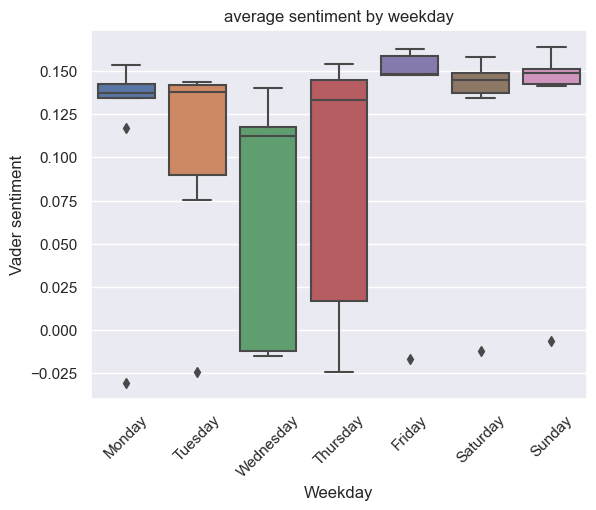

In [ ]:
sns.boxplot(data=data, x='Weekday', y='score_V')
plt.title('average sentiment by weekday')
plt.xticks(rotation=45)
plt.ylabel('Vader sentiment')

can the sudden drop at the end of the time serie be explained by the days being mostly wed and thursday maybe?

Text(0, 0.5, 'Vader Sentiment')

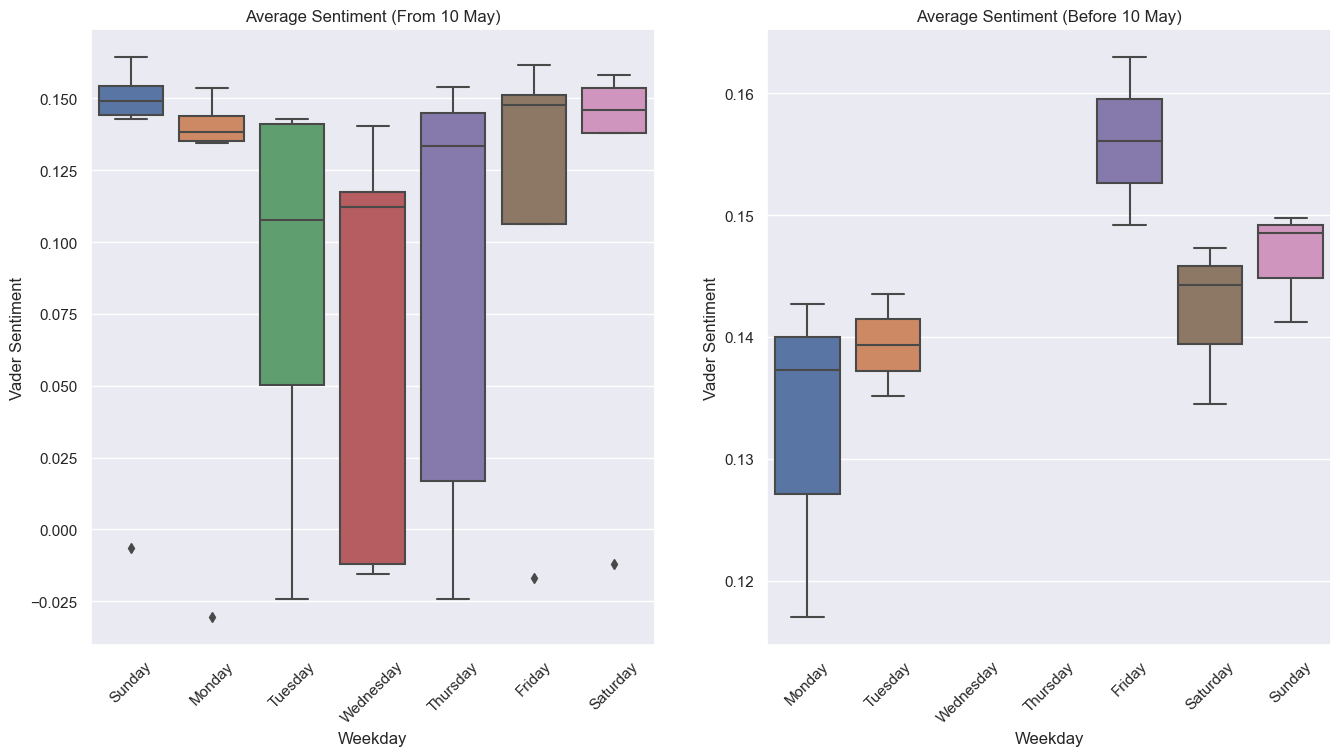

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.boxplot(data=data['2009-05-10':], x='Weekday', y='score_V', ax=axes[0])
axes[0].set_title('Average Sentiment (From 10 May)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
axes[0].set_ylabel('Vader Sentiment')

sns.boxplot(data=data[:'2009-05-10'], x='Weekday', y='score_V', ax=axes[1])
axes[1].set_title('Average Sentiment (Before 10 May)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)  # Rotate x-axis labels
axes[1].set_ylabel('Vader Sentiment')

yeah looks like, myself I hate wednesday too...I'm sure twitter does the same

In [ ]:
#one way anova just in case

import pandas as pd
from scipy import stats

mon = data[data['Weekday']=='Monday']['score_V'].dropna().values
tue = data[data['Weekday']=='Tuesday']['score_V'].dropna().values
wed = data[data['Weekday']=='Wednesday']['score_V'].dropna().values
thu = data[data['Weekday']=='Thursday']['score_V'].dropna().values
fri = data[data['Weekday']=='Friday']['score_V'].dropna().values
sat = data[data['Weekday']=='Saturday']['score_V'].dropna().values
sun = data[data['Weekday']=='Sunday']['score_V'].dropna().values

for x in [mon, tue, wed, thu, fri, sat, sun]:
    f,p = stats.kstest(x,'norm')
    if p<0.05:
        print(f'group is not normal')
#    kruskal(mon, tue, wed, thu, fri, sat, sun)

# non normal data, need to use non parametric

#perform non parametric one way anova
if stats.kruskal(mon, tue, wed, thu, fri, sat, sun)[1] > 0.05:
    print('\nH0 accepted: medians of groups are equal')
else:
    print('\nH0 rejected: medians of groups are not equal')


group is not normal
group is not normal
group is not normal

H0 rejected: medians of groups are not equal


Different weekdays have statistically different median scores therefore we should use weekday as variable in time serie

#### Filling missing values

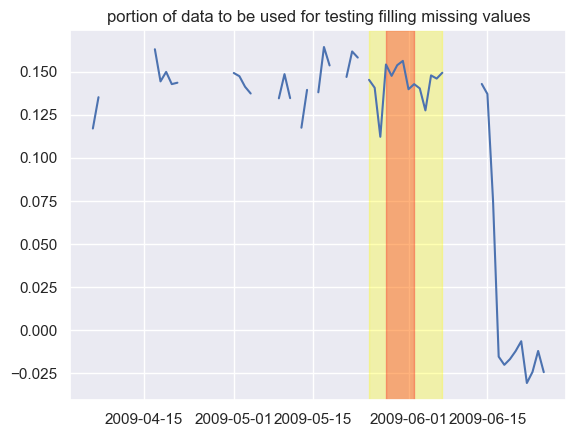

In [ ]:
#testing different filling tools on a part of the dataset
plt.plot(data.index,data['score_V'])
plt.title("portion of data to be used for testing filling missing values")
#missing values proportion od daily dataset = 41% (shown previously)
# in yellow is 2 weeks of data I'm gonna use for testing different filling strategies
# 41% of 2 weeks is 6 days roughly
# in red I'll highlight 6 days that I'll use to calsulate RMSE of different strategies
plt.axvspan("2009-05-25", "2009-06-07", alpha=0.3, color='yellow') 
plt.axvspan("2009-05-28", "2009-06-02", alpha=0.3, color='red') 



(array([14389., 14391., 14393., 14395., 14396., 14398., 14400., 14402.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

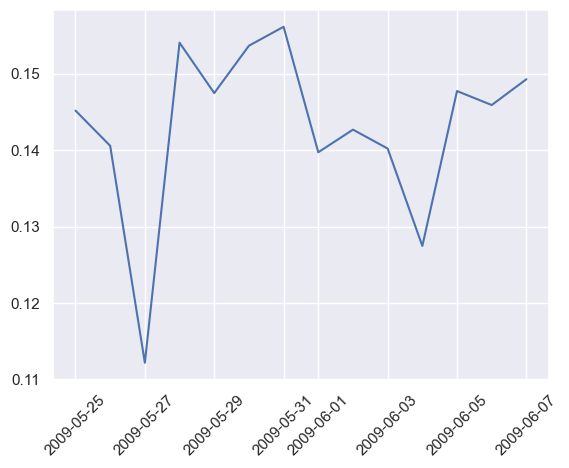

In [ ]:
#creating testing dataset
test = data.loc['2009-05-25':'2009-06-07']
test['test'] = test['score_V']
test['True'] = test['score_V']
plt.plot(test['score_V'])
plt.xticks(rotation=45)

In [ ]:
import numpy as np
replace_dates = ["2009-05-28", "2009-05-29", "2009-05-30","2009-05-31","2009-06-01","2009-06-02"]

# Replace the values in the 'Value1' column at the specified dates with NaN
for date in replace_dates:
    test.loc[test.index == date, 'test'] = np.nan
test



,score_V,Weekday,test,True
date,,,,
2009-05-25,0.145201,Monday,0.145201,0.145201
2009-05-26,0.140592,Tuesday,0.140592,0.140592
2009-05-27,0.112172,Wednesday,0.112172,0.112172
2009-05-28,0.154097,Thursday,NaN,0.154097
2009-05-29,0.147498,Friday,NaN,0.147498
2009-05-30,0.153699,Saturday,NaN,0.153699
2009-05-31,0.156180,Sunday,NaN,0.156180
2009-06-01,0.139743,Monday,NaN,0.139743
2009-06-02,0.142708,Tuesday,NaN,0.142708


In [ ]:
#calculating different interpolation methods
test['linear'] = test['test'].interpolate(method='linear')
test['polynomial 2'] = test['test'].interpolate(method='polynomial', order=2)
test['polynomial 3'] = test['test'].interpolate(method='polynomial', order=3)
test['padding'] = test['test'].interpolate(method='pad', limit=6)

test

,score_V,Weekday,test,True,linear,polynomial 2,polynomial 3,padding
date,,,,,,,,
2009-05-25,0.145201,Monday,0.145201,0.145201,0.145201,0.145201,0.145201,0.145201
2009-05-26,0.140592,Tuesday,0.140592,0.140592,0.140592,0.140592,0.140592,0.140592
2009-05-27,0.112172,Wednesday,0.112172,0.112172,0.112172,0.112172,0.112172,0.112172
2009-05-28,0.154097,Thursday,NaN,0.154097,0.116181,0.093756,0.097565,0.112172
2009-05-29,0.147498,Friday,NaN,0.147498,0.120189,0.090978,0.099388,0.112172
2009-05-30,0.153699,Saturday,NaN,0.153699,0.124198,0.103839,0.111506,0.112172
2009-05-31,0.156180,Sunday,NaN,0.156180,0.128206,0.128841,0.127784,0.112172
2009-06-01,0.139743,Monday,NaN,0.139743,0.132215,0.144990,0.142087,0.112172
2009-06-02,0.142708,Tuesday,NaN,0.142708,0.136223,0.148786,0.148281,0.112172


(array([14389., 14391., 14393., 14395., 14396., 14398., 14400., 14402.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

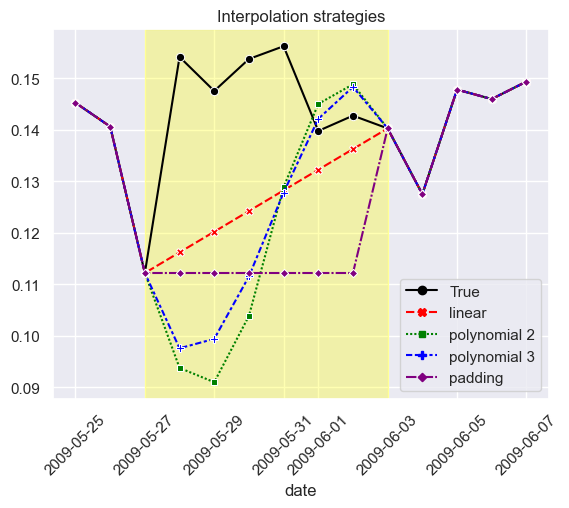

In [ ]:
colors = {
    'linear': 'red',
    'polynomial 2': 'green',
    'polynomial 3': 'blue',
    'padding': 'purple',
    'True': 'black'}

sns.lineplot(data=test[['True','linear','polynomial 2','polynomial 3','padding']], markers=True,alpha=1,palette=colors)
plt.title("Interpolation strategies")
plt.axvspan("2009-05-27", "2009-06-03", alpha=0.3, color='yellow')
plt.xticks(rotation=45)


 #### Inputting missing data counting for exogenous variable (day of the week)

creating a model for predicting missing values with exogenous variable (weekday) using the longer interval of days we have which are 2 weeks from 05-25 to 06-07

In [ ]:
def seasonal_mean(ts, n, lr=.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

data['seasonal_mean'] = seasonal_mean(data['score_V'], n=7, lr=1.05)


Text(0.5, 1.0, 'Data Visualization')

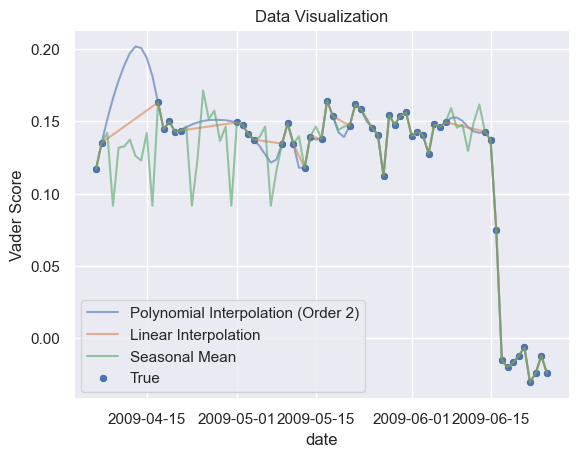

In [ ]:
sns.lineplot(data=data['score_V'].interpolate(method='polynomial', order=2), markers=True, alpha=0.6, label='Polynomial Interpolation (Order 2)')
sns.lineplot(data=data['score_V'].interpolate(method='linear'), markers=True, alpha=0.6, label='Linear Interpolation')
sns.lineplot(data=data['seasonal_mean'], markers=True, alpha=0.6, label='Seasonal Mean')
sns.scatterplot(data=data['score_V'], alpha=1, label='True')

# Set labels and title
plt.ylabel('Vader Score')
plt.title('Data Visualization')